# Урок 8. Дисперсионный анализ. Логистическая регрессия

***
## Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.
***

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

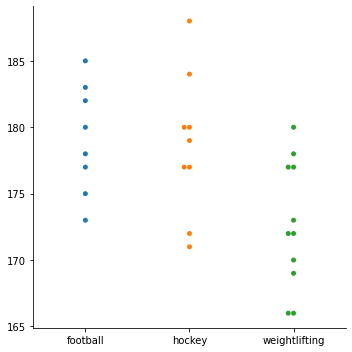

In [104]:
X1 = np.array([173, 175, 180, 178, 177, 185, 183, 182, np.nan, np.nan, np.nan])
X2 = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180, np.nan, np.nan])
X3 = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

X = np.array([X1, X2, X3])

data = pd.DataFrame(X.T,
                   columns=['football', 'hockey', 'weightlifting'])

sns.catplot(data=data, kind='swarm')

In [69]:
k = 3 # кол-во групп
n = 8 + 9 + 11 # кол-во замеров в целом

# средние значения внутри каждой группы
y1 = data['football'].mean()
y2 = data['hockey'].mean()
y3 = data['weightlifting'].mean()

# глобальное среднее по всем замерам
Y = (data['football'].sum() + data['hockey'].sum() + data['weightlifting'].sum()) / n

# S^2 - сумма квадратов отклонений наблюдений от общего среднего
data_var = (data - Y) ** 2
S2_glob = data_var['football'].sum() + data_var['hockey'].sum() + data_var['weightlifting'].sum()

# S^2(F) - сумма квадратов отклонений средних групповых значений от общего среднего значения Y
S2_F = ((y1 - Y) ** 2) * 8 + ((y2 - Y) ** 2) * 9 + ((y3 - Y) ** 2) * 11

# S^2(remained) - остаточная сумма квадратов отклонений
S2_rem = ((data['football'] - y1) ** 2).sum() + ((data['hockey'] - y2) ** 2).sum() + ((data['weightlifting'] - y3) ** 2).sum()

# sig^2(F) - факторная дисперсия
sig2_F = S2_glob / (k - 1)

# sig^2(rem) - остаточная дисперсия
sig2_rem = S2_rem / (n - k)

# Fh - критерий Фишера
Fh = sig2_F / sig2_rem

# F_crit - отсечка значений критерия Фишера, для принятия/отклонения нулевой гипотезы
# df1 = k - 1 = 2     df2 = n - k = 25
F_crit = 2.53

In [95]:
print(f'Кол-во групп: {k}\n'
      f'Кол-во замеров роста: {n}\n\n'
      f'Средний рост футболистов: {int(y1)}\n'
      f'Средний рост хоккеистов: {int(y2)}\n'
      f'Средний рост штангистов: {int(y3)}\n'
      f'Средний рост спортсменов в целом: {int(Y)}\n\n'
      f'Cумма квадратов отклонений наблюдений от общего среднего: \n{S2_glob}\n\n'
      f'Cумма квадратов отклонений средних групповых значений от общего среднего: \n{S2_F}\n\n'
      f'Остаточная сумма квадратов отклонений: \n{S2_rem}\n\n'
      f'Факторная дисперсия: {sig2_F}\n'
      f'Остаточная дисперсия: {sig2_rem}\n\n'
      f'Критерий Фишера: {Fh}\n'
      f'Критическое значение Фишера: {F_crit}\n\n'
      f'Вывод: {Fh} > {F_crit}, \nзначит вид спорта вносит статистически важную разницу в рост самих спортсменов')

Кол-во групп: 3
Кол-во замеров роста: 28

Средний рост футболистов: 179
Средний рост хоккеистов: 178
Средний рост штангистов: 172
Средний рост спортсменов в целом: 176

Cумма квадратов отклонений наблюдений от общего среднего: 
830.9642857142858

Cумма квадратов отклонений средних групповых значений от общего среднего: 
253.9074675324678

Остаточная сумма квадратов отклонений: 
577.0568181818182

Факторная дисперсия: 415.4821428571429
Остаточная дисперсия: 23.08227272727273

Критерий Фишера: 18.00005345081259
Критическое значение Фишера: 2.53

Вывод: 18.00005345081259 > 2.53, 
значит вид спорта вносит статистически важную разницу в рост самих спортсменов
